<a href="https://colab.research.google.com/github/nicjm18/Prediccion-de-Accidentes/blob/main/Entrenamiento_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Entrenamiento de los modelos de machine learning

In [1]:
#Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Cargamos la base de datos limpia
data = pd.read_csv("datos_limpio_final.csv")
data.head()

,ACRS Report Type,Route Type,Cross-Street Type,Collision Type,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,Driver Distracted By,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Speed Limit,Parked Vehicle,Equipment Problems
0,Property Damage Crash,Maryland (State),Unknown,STRAIGHT MOVEMENT ANGLE,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,No,NOT DISTRACTED,DISABLING,THREE OCLOCK,TWO OCLOCK,PASSENGER CAR,MAKING LEFT TURN,40.0,No,NO MISUSE
1,Property Damage Crash,Maryland (State),Maryland (State),STRAIGHT MOVEMENT ANGLE,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,Yes,NOT DISTRACTED,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,PICKUP TRUCK,ACCELERATING,35.0,No,NO MISUSE
2,Property Damage Crash,County,County,STRAIGHT MOVEMENT ANGLE,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,Yes,LOOKED BUT DID NOT SEE,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,STARTING FROM LANE,40.0,No,NO MISUSE
3,Property Damage Crash,County,County,HEAD ON LEFT TURN,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,Yes,NOT DISTRACTED,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,(SPORT) UTILITY VEHICLE,MAKING LEFT TURN,35.0,No,NO MISUSE
4,Property Damage Crash,County,County,SAME DIR REAR END,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,No,NOT DISTRACTED,FUNCTIONAL,SIX OCLOCK,SIX OCLOCK,TRANSIT BUS,STOPPED IN TRAFFIC LANE,30.0,No,NO MISUSE


### Organización de datos para los modelos

In [3]:
object_columns = [
    'ACRS Report Type', 'Route Type', 'Cross-Street Type', 'Collision Type', 'Surface Condition',
    'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Driver Distracted By',
    'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location',
    'Vehicle Body Type', 'Vehicle Movement', 'Parked Vehicle', 'Equipment Problems']

# Convertir columnas de tipo object a category
for col in object_columns:
    data[col] = data[col].astype('category')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18918 entries, 0 to 18917
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ACRS Report Type                18918 non-null  category
 1   Route Type                      18918 non-null  category
 2   Cross-Street Type               18918 non-null  category
 3   Collision Type                  18918 non-null  category
 4   Surface Condition               18918 non-null  category
 5   Light                           18918 non-null  category
 6   Traffic Control                 18918 non-null  category
 7   Driver Substance Abuse          18918 non-null  category
 8   Driver At Fault                 18918 non-null  category
 9   Driver Distracted By            18918 non-null  category
 10  Vehicle Damage Extent           18918 non-null  category
 11  Vehicle First Impact Location   18918 non-null  category
 12  Vehicle Second Imp

### Division de los datos 70% para entrenamiento y 30% para evaluacion

<Axes: xlabel='ACRS Report Type'>

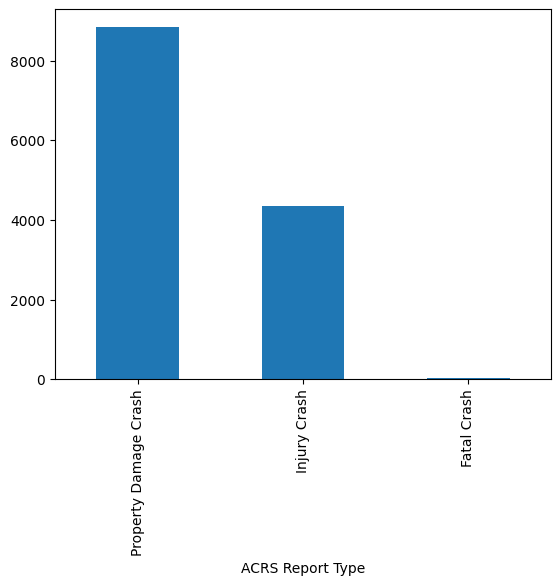

In [5]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("ACRS Report Type", axis = 1) # Variables predictoras
Y = data['ACRS Report Type'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')# Objetivo del 70%

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13242 entries, 8195 to 17514
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Route Type                      13242 non-null  category
 1   Cross-Street Type               13242 non-null  category
 2   Collision Type                  13242 non-null  category
 3   Surface Condition               13242 non-null  category
 4   Light                           13242 non-null  category
 5   Traffic Control                 13242 non-null  category
 6   Driver Substance Abuse          13242 non-null  category
 7   Driver At Fault                 13242 non-null  category
 8   Driver Distracted By            13242 non-null  category
 9   Vehicle Damage Extent           13242 non-null  category
 10  Vehicle First Impact Location   13242 non-null  category
 11  Vehicle Second Impact Location  13242 non-null  category
 12  Vehicle Body Type   

<Axes: xlabel='ACRS Report Type'>

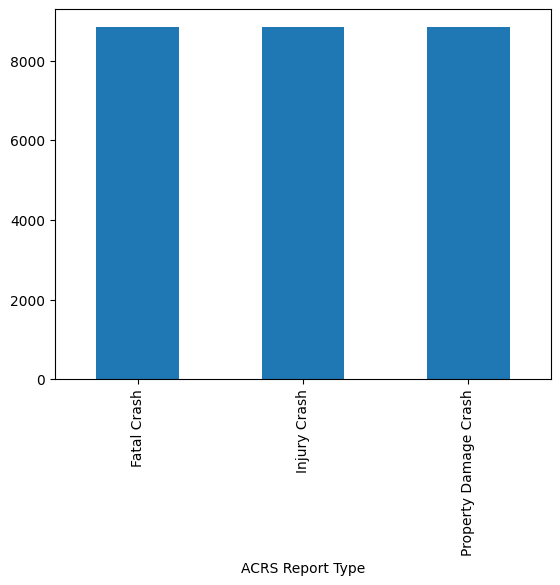

In [7]:
#Balanceamos la variable objetivo (solo en el 70%)
from imblearn.over_sampling import SMOTENC

# Aplicar SMOTE para balancear las clases
smote = SMOTENC(categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16])
X_train, Y_train = smote.fit_resample(X_train, Y_train)

Y_train.value_counts().plot(kind='bar')

In [8]:
#Variables categoricas con mas de 2 categorias
variables_categoricas = [
    'Route Type', 'Cross-Street Type', 'Collision Type', 'Surface Condition',
    'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Driver Distracted By',
    'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location',
    'Vehicle Body Type', 'Vehicle Movement', 'Equipment Problems']

combinado = pd.concat([X_train, X_test], axis=0)

categoricas = [col for col in variables_categoricas if col != 'Parked Vehicle']

combinado = pd.get_dummies(combinado, columns=['Parked Vehicle'], drop_first=True)
combinado = pd.get_dummies(combinado, columns=categoricas, drop_first=False)

index_division = X_train.shape[0]
X_train = combinado.iloc[:index_division, :]
X_test = combinado.iloc[index_division:, :]

X_train.head()

,Speed Limit,Parked Vehicle_Yes,Route Type_County,Route Type_Government,Route Type_Interstate (State),Route Type_Maryland (State),Route Type_Municipality,Route Type_Other Public Roadway,Route Type_Ramp,Route Type_Service Road,...,Vehicle Movement_STOPPED IN TRAFFIC LANE,Vehicle Movement_UNKNOWN,Equipment Problems_AIR BAG FAILED,Equipment Problems_BELT(S) MISUSED,Equipment Problems_NO MISUSE,Equipment Problems_NOT STREPPED RIGHT,Equipment Problems_OTHER,Equipment Problems_SIZE/TYPE IMPROPER,Equipment Problems_STRAP/TETHER LOOSE,Equipment Problems_UNKNOWN
0,40.0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,35.0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,15.0,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,35.0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,25.0,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [9]:
import joblib
# Guardar columnas
columnas = X_train.columns
joblib.dump(columnas, 'columnas.pkl')

['columnas.pkl']

In [10]:
#Se codifican las categorias de "ACRS Report Type"

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y_train = labelencoder.fit_transform(Y_train) #Objetivo
Y_test = labelencoder.transform(Y_test)

print(Y_train)

[1 2 2 ... 1 1 1]


In [11]:
# Ver las clases
print(labelencoder.classes_)

# Diccionario con las asignaciones
label_mapping = {index: label for index, label in enumerate(labelencoder.classes_)}
print(label_mapping)

['Fatal Crash' 'Injury Crash' 'Property Damage Crash']
{0: 'Fatal Crash', 1: 'Injury Crash', 2: 'Property Damage Crash'}


### Entrenamiento de los 4 modelos de aprendizaje automatico supervisado

### Arbol

In [12]:
from sklearn.model_selection import cross_validate
from sklearn import tree

modelTree = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=20, max_depth=16)

#Validación Cruzada: division, aprendizaje, evaluacion
s_metrics = ['f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted']
scores_tree = cross_validate(modelTree, X_train, Y_train, cv=10, scoring= s_metrics, return_train_score=True, return_estimator=False,n_jobs=-1)
scores_tree = pd.DataFrame(scores_tree) #Se almacenan los resultados en un dataframe
scores_tree

,fit_time,score_time,test_f1_weighted,train_f1_weighted,test_accuracy,train_accuracy,test_precision_weighted,train_precision_weighted,test_recall_weighted,train_recall_weighted
0,0.510399,0.017888,0.739546,0.820718,0.740211,0.821777,0.739105,0.821711,0.740211,0.821777
1,0.547676,0.015987,0.755317,0.820578,0.756401,0.821400,0.754357,0.821604,0.756401,0.821400
2,0.570334,0.017531,0.736140,0.815050,0.736822,0.816169,0.735550,0.817521,0.736822,0.816169
3,0.540879,0.036416,0.764550,0.819311,0.766102,0.820069,0.763522,0.819927,0.766102,0.820069
4,0.585980,0.016983,0.750934,0.820501,0.752166,0.821282,0.750169,0.821077,0.752166,0.821282
5,0.541430,0.021052,0.839148,0.814298,0.840678,0.815173,0.845621,0.814928,0.840678,0.815173
6,0.534980,0.017154,0.811044,0.812231,0.814313,0.813206,0.821790,0.813896,0.814313,0.813206
7,0.563123,0.036330,0.822865,0.812349,0.825989,0.813792,0.835257,0.816067,0.825989,0.813792
8,0.475921,0.020920,0.810155,0.811946,0.813936,0.813248,0.825442,0.814902,0.813936,0.813248
9,0.523419,0.015060,0.817901,0.813157,0.820716,0.814169,0.827872,0.815527,0.820716,0.814169


In [13]:
#Promedios
scores_tree.mean()

fit_time                    0.539414
score_time                  0.021532
test_f1_weighted            0.784760
train_f1_weighted           0.816014
test_accuracy               0.786733
train_accuracy              0.817028
test_precision_weighted     0.789869
train_precision_weighted    0.817716
test_recall_weighted        0.786733
train_recall_weighted       0.817028
dtype: float64

In [14]:
#Pueba en el set de prueba
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
modelTree.fit(X_train, Y_train)

Y_pred = modelTree.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6145172656800564
Precision: 0.6494696207339714
Recall: 0.6145172656800564
F1 Score: 0.6256946320182971


### Normalización de los datos para los modelos

In [15]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['Speed Limit']]) #Ajuste de los parametros: max - min

#Se aplica la normalización a 70%  y 30%
X_train[['Speed Limit']]= min_max_scaler.transform(X_train[['Speed Limit']]) #70%
X_test[['Speed Limit']]= min_max_scaler.transform(X_test[['Speed Limit']]) #30%
X_train.head()

<ipython-input-15-a65f7a078279>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['Speed Limit']]= min_max_scaler.transform(X_train[['Speed Limit']]) #70%
<ipython-input-15-a65f7a078279>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['Speed Limit']]= min_max_scaler.transform(X_test[['Speed Limit']]) #30%


,Speed Limit,Parked Vehicle_Yes,Route Type_County,Route Type_Government,Route Type_Interstate (State),Route Type_Maryland (State),Route Type_Municipality,Route Type_Other Public Roadway,Route Type_Ramp,Route Type_Service Road,...,Vehicle Movement_STOPPED IN TRAFFIC LANE,Vehicle Movement_UNKNOWN,Equipment Problems_AIR BAG FAILED,Equipment Problems_BELT(S) MISUSED,Equipment Problems_NO MISUSE,Equipment Problems_NOT STREPPED RIGHT,Equipment Problems_OTHER,Equipment Problems_SIZE/TYPE IMPROPER,Equipment Problems_STRAP/TETHER LOOSE,Equipment Problems_UNKNOWN
0,0.533333,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,0.466667,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.200000,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.466667,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0.333333,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [16]:
joblib.dump(min_max_scaler, 'scaler.pkl')

['scaler.pkl']

### KNN

In [17]:
from sklearn.neighbors  import KNeighborsClassifier

modelKnn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

#Validación Cruzada: aprendizaje, evaluacion
scores_knn = cross_validate(modelKnn, X_train, Y_train, cv=10, scoring= s_metrics, return_train_score=True, return_estimator=False,n_jobs=-1)
scores_knn = pd.DataFrame(scores_knn)
scores_knn

,fit_time,score_time,test_f1_weighted,train_f1_weighted,test_accuracy,train_accuracy,test_precision_weighted,train_precision_weighted,test_recall_weighted,train_recall_weighted
0,0.113010,2.091489,0.791464,0.901333,0.791416,0.901578,0.791815,0.902204,0.791416,0.901578
1,0.169919,2.111621,0.785999,0.900125,0.786898,0.900364,0.785327,0.901124,0.786898,0.900364
2,0.157633,2.068920,0.782971,0.901635,0.783886,0.901912,0.783122,0.902870,0.783886,0.901912
3,0.160250,2.038399,0.784742,0.901846,0.785687,0.902126,0.783904,0.903327,0.785687,0.902126
4,0.098261,2.122441,0.785924,0.901867,0.786817,0.902168,0.787408,0.903317,0.786817,0.902168
5,0.166641,2.011231,0.845572,0.896074,0.847834,0.896351,0.856868,0.897130,0.847834,0.896351
6,0.101085,2.028816,0.841860,0.894189,0.844068,0.894468,0.850850,0.895134,0.844068,0.894468
7,0.182604,2.029432,0.840505,0.896599,0.842938,0.896853,0.852279,0.897516,0.842938,0.896853
8,0.223164,3.603270,0.836153,0.897551,0.838418,0.897816,0.846525,0.898438,0.838418,0.897816
9,0.245394,3.562409,0.837988,0.895348,0.840678,0.895598,0.850049,0.896122,0.840678,0.895598


In [18]:
#Promedios
scores_knn.mean()

fit_time                    0.161796
score_time                  2.366803
test_f1_weighted            0.813318
train_f1_weighted           0.898657
test_accuracy               0.814864
train_accuracy              0.898923
test_precision_weighted     0.818815
train_precision_weighted    0.899718
test_recall_weighted        0.814864
train_recall_weighted       0.898923
dtype: float64

In [23]:
#Prueba en el set de prueba
modelKnn.fit(X_train, Y_train)

Y_pred = modelKnn.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6046511627906976
Precision: 0.6339832214190576
Recall: 0.6046511627906976
F1 Score: 0.6145900256343553


### Red Neuronal

In [20]:
from sklearn.neural_network import MLPClassifier #MLPRegressor
modelNN = MLPClassifier(activation="logistic",hidden_layer_sizes=(5), learning_rate='constant',
                     learning_rate_init=0.2, momentum= 0.3, max_iter=200, random_state=3)

#Validación Cruzada: aprendizaje, evaluacion
scores_nn = cross_validate(modelNN, X_train, Y_train, cv=10, scoring= s_metrics, return_train_score=True, return_estimator=False,n_jobs=-1)
scores_nn = pd.DataFrame(scores_nn)
scores_nn

,fit_time,score_time,test_f1_weighted,train_f1_weighted,test_accuracy,train_accuracy,test_precision_weighted,train_precision_weighted,test_recall_weighted,train_recall_weighted
0,9.541988,0.025661,0.751580,0.806746,0.751130,0.809348,0.753776,0.816784,0.751130,0.809348
1,9.361698,0.026183,0.746358,0.801703,0.747741,0.801984,0.745929,0.801513,0.747741,0.801984
2,10.768290,0.049441,0.733585,0.800727,0.736069,0.804578,0.735574,0.813667,0.736069,0.804578
3,14.004480,0.029310,0.759340,0.808988,0.761205,0.809064,0.761487,0.808949,0.761205,0.809064
4,9.269609,0.023840,0.735904,0.762189,0.751412,0.778517,0.776917,0.821183,0.751412,0.778517
5,12.131124,0.045340,0.827809,0.803033,0.830508,0.804754,0.840504,0.809149,0.830508,0.804754
6,9.140281,0.022920,0.774094,0.766060,0.789454,0.780358,0.835814,0.818236,0.789454,0.780358
7,7.759272,0.026285,0.785261,0.775420,0.800000,0.786175,0.849561,0.815175,0.800000,0.786175
8,7.445499,0.027186,0.754167,0.769287,0.777024,0.783873,0.844658,0.825274,0.777024,0.783873
9,4.764618,0.019060,0.812047,0.779997,0.812806,0.782492,0.811777,0.786860,0.812806,0.782492


In [21]:
#Promedios
scores_nn.mean()

fit_time                    9.418686
score_time                  0.029523
test_f1_weighted            0.768014
train_f1_weighted           0.787415
test_accuracy               0.775735
train_accuracy              0.794114
test_precision_weighted     0.795600
train_precision_weighted    0.811679
test_recall_weighted        0.775735
train_recall_weighted       0.794114
dtype: float64

In [24]:
#Prueba en el set de prueba
modelNN.fit(X_train, Y_train)

Y_pred = modelNN.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6286116983791402
Precision: 0.6536976726179677
Recall: 0.6286116983791402
F1 Score: 0.6369389272327789


### SVM

In [25]:
from sklearn.svm import SVC
modelSVM = SVC(kernel='linear')

#Validación Cruzada: aprendizaje, evaluacion
scores_svm = cross_validate(modelSVM, X_train, Y_train, cv=10, scoring= s_metrics, return_train_score=True, return_estimator=False,n_jobs=-1)
scores_svm = pd.DataFrame(scores_svm)
scores_svm

,fit_time,score_time,test_f1_weighted,train_f1_weighted,test_accuracy,train_accuracy,test_precision_weighted,train_precision_weighted,test_recall_weighted,train_recall_weighted
0,158.580008,11.291816,0.745322,0.797426,0.745482,0.800310,0.748177,0.806629,0.745482,0.800310
1,161.779972,11.251566,0.743087,0.796163,0.745105,0.798971,0.744019,0.805033,0.745105,0.798971
2,150.919148,11.834368,0.747873,0.795412,0.748870,0.798301,0.747875,0.804474,0.748870,0.798301
3,147.810679,11.987335,0.756134,0.793405,0.757815,0.796510,0.755901,0.803356,0.757815,0.796510
4,146.836835,11.523831,0.757524,0.794257,0.758945,0.797096,0.759757,0.803209,0.758945,0.797096
5,156.903745,10.379973,0.815949,0.784821,0.821846,0.788183,0.841898,0.794760,0.821846,0.788183
6,161.398271,11.260154,0.802649,0.785357,0.808663,0.788811,0.825894,0.795542,0.808663,0.788811
7,160.365389,11.162153,0.815286,0.784547,0.821092,0.787890,0.840542,0.794318,0.821092,0.787890
8,158.583056,12.495436,0.810724,0.783549,0.816949,0.786970,0.838282,0.793327,0.816949,0.786970
9,159.130550,13.765095,0.819700,0.785061,0.825235,0.788350,0.844602,0.794791,0.825235,0.788350


In [26]:
#Promedios
scores_svm.mean()

fit_time                    156.230765
score_time                   11.695173
test_f1_weighted              0.781425
train_f1_weighted             0.790000
test_accuracy                 0.785000
train_accuracy                0.793139
test_precision_weighted       0.794695
train_precision_weighted      0.799544
test_recall_weighted          0.785000
train_recall_weighted         0.793139
dtype: float64

In [28]:
#Prueba en el set de prueba
modelSVM.fit(X_train, Y_train)

Y_pred = modelSVM.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5960183227625088
Precision: 0.6639579405097341
Recall: 0.5960183227625088
F1 Score: 0.6084823502425016


### Métodos de Ensamble

### RandomForest

In [29]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='gini',
                              max_depth=None, min_samples_leaf=2)


#Validación Cruzada: aprendizaje, evaluacion
scores_rf = cross_validate(model_rf, X_train, Y_train, cv=10, scoring= s_metrics, return_train_score=True, return_estimator=False,n_jobs=-1)
scores_rf = pd.DataFrame(scores_rf)
scores_rf

,fit_time,score_time,test_f1_weighted,train_f1_weighted,test_accuracy,train_accuracy,test_precision_weighted,train_precision_weighted,test_recall_weighted,train_recall_weighted
0,5.443619,0.113326,0.777994,0.903551,0.777485,0.903921,0.779561,0.905540,0.777485,0.903921
1,5.307829,0.125053,0.774435,0.902937,0.775602,0.903210,0.774187,0.904672,0.775602,0.903210
2,10.194426,0.096667,0.768882,0.902146,0.769955,0.902456,0.771137,0.904078,0.769955,0.902456
3,9.693344,0.213823,0.791306,0.903166,0.792090,0.903423,0.792278,0.904979,0.792090,0.903423
4,5.633096,0.136398,0.778848,0.901810,0.779284,0.902084,0.778889,0.903564,0.779284,0.902084
5,6.084794,0.247104,0.876804,0.897254,0.878343,0.897606,0.887778,0.899522,0.878343,0.897606
6,6.258379,0.112936,0.863258,0.897125,0.865160,0.897439,0.875468,0.899153,0.865160,0.897439
7,5.942998,0.102818,0.870704,0.898431,0.873070,0.898736,0.887799,0.900661,0.873070,0.898736
8,5.892839,0.179521,0.865720,0.900362,0.868173,0.900661,0.883359,0.902523,0.868173,0.900661
9,6.145081,0.222923,0.860690,0.898965,0.863277,0.899280,0.877275,0.901055,0.863277,0.899280


In [30]:
#Promedios
scores_rf.mean()

fit_time                    6.659640
score_time                  0.155057
test_f1_weighted            0.822864
train_f1_weighted           0.900575
test_accuracy               0.824244
train_accuracy              0.900882
test_precision_weighted     0.830773
train_precision_weighted    0.902575
test_recall_weighted        0.824244
train_recall_weighted       0.900882
dtype: float64

In [31]:
#Prueba en el set de prueba
model_rf.fit(X_train, Y_train)

Y_pred = model_rf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6486962649753347
Precision: 0.6716533133584798
Recall: 0.6486962649753347
F1 Score: 0.6564477117363455


### XGBoost

In [32]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100, subsample=0.8)

#Validación Cruzada: aprendizaje, evaluacion
scores_xgb = cross_validate(model_xgb, X_train, Y_train, cv=10, scoring= s_metrics, return_train_score=True, return_estimator=False,n_jobs=-1)
scores_xgb = pd.DataFrame(scores_xgb)
scores_xgb

,fit_time,score_time,test_f1_weighted,train_f1_weighted,test_accuracy,train_accuracy,test_precision_weighted,train_precision_weighted,test_recall_weighted,train_recall_weighted
0,8.291894,0.329355,0.782331,0.914857,0.782380,0.915010,0.787176,0.916625,0.782380,0.915010
1,8.525621,0.330988,0.790109,0.918016,0.791039,0.918149,0.791631,0.919887,0.791039,0.918149
2,9.360317,0.179480,0.774129,0.916787,0.775226,0.916935,0.776790,0.918689,0.775226,0.916935
3,8.968639,0.173571,0.791671,0.915066,0.793220,0.915223,0.796134,0.917087,0.793220,0.915223
4,10.644789,0.262353,0.784200,0.916174,0.784557,0.916311,0.784786,0.917909,0.784557,0.916311
5,10.082117,0.171086,0.888650,0.907006,0.890019,0.907189,0.900986,0.909154,0.890019,0.907189
6,9.305503,0.365150,0.881893,0.907978,0.883616,0.908193,0.895876,0.910492,0.883616,0.908193
7,10.980834,0.365786,0.879621,0.909637,0.881733,0.909825,0.895868,0.911875,0.881733,0.909825
8,8.193745,0.171767,0.885653,0.909456,0.887382,0.909658,0.900992,0.911839,0.887382,0.909658
9,7.909819,0.172102,0.882577,0.909231,0.884369,0.909448,0.897877,0.911849,0.884369,0.909448


In [33]:
#Promedios
scores_xgb.mean()

fit_time                    9.226328
score_time                  0.252164
test_f1_weighted            0.834083
train_f1_weighted           0.912421
test_accuracy               0.835354
train_accuracy              0.912594
test_precision_weighted     0.842812
train_precision_weighted    0.914540
test_recall_weighted        0.835354
train_recall_weighted       0.912594
dtype: float64

In [34]:
#Prueba en el set de prueba
model_xgb.fit(X_train, Y_train)

Y_pred = model_xgb.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6599718111346018
Precision: 0.6743854870650191
Recall: 0.6599718111346018
F1 Score: 0.6654607552906852


### Votacion Soft

In [35]:
from sklearn.ensemble import VotingClassifier

clasificadores= [('dt', modelTree), ('knn', modelKnn), ('net', modelNN)]
model_vot_soft = VotingClassifier(estimators=clasificadores, voting='soft', weights=[0.2, 0.6, 0.2])

#Validación Cruzada: aprendizaje, evaluacion
scores_vs = cross_validate(model_vot_soft, X_train, Y_train, cv=10, scoring= s_metrics, return_train_score=True, return_estimator=False,n_jobs=-1)
scores_vs = pd.DataFrame(scores_vs)
scores_vs

,fit_time,score_time,test_f1_weighted,train_f1_weighted,test_accuracy,train_accuracy,test_precision_weighted,train_precision_weighted,test_recall_weighted,train_recall_weighted
0,16.333772,1.891752,0.799533,0.906642,0.799322,0.906808,0.799749,0.907441,0.799322,0.906808
1,16.412762,1.892961,0.791784,0.905609,0.792545,0.905679,0.791351,0.905784,0.792545,0.905679
2,12.763359,2.326701,0.782529,0.907941,0.783133,0.908064,0.781996,0.908392,0.783133,0.908064
3,14.320378,1.897392,0.793296,0.905611,0.793974,0.905808,0.792663,0.907192,0.793974,0.905808
4,12.402984,3.374470,0.787492,0.904860,0.788701,0.905222,0.790775,0.908155,0.788701,0.905222
5,16.571199,3.025536,0.857798,0.899196,0.859887,0.899364,0.870134,0.900221,0.859887,0.899364
6,7.780926,2.691732,0.853249,0.897111,0.855367,0.897314,0.864862,0.898405,0.855367,0.897314
7,7.513029,3.029831,0.848398,0.899710,0.851224,0.899908,0.864055,0.901088,0.851224,0.899908
8,8.600226,2.079060,0.846918,0.899234,0.849341,0.899448,0.859992,0.900716,0.849341,0.899448
9,6.862006,2.436521,0.856741,0.900023,0.858380,0.900117,0.865792,0.900141,0.858380,0.900117


In [36]:
#Promedios
scores_vs.mean()

fit_time                    11.956064
score_time                   2.464596
test_f1_weighted             0.821774
train_f1_weighted            0.902594
test_accuracy                0.823187
train_accuracy               0.902773
test_precision_weighted      0.828137
train_precision_weighted     0.903754
test_recall_weighted         0.823187
train_recall_weighted        0.902773
dtype: float64

In [38]:
#Prueba en el set de prueba
model_vot_soft.fit(X_train, Y_train)

Y_pred = model_vot_soft.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6208597603946441
Precision: 0.6443919951370259
Recall: 0.6208597603946441
F1 Score: 0.6293557668079991


### Evaluacion de diferencias estadisticas entre los modelos para escoger el modelo a hiperparametrizar (Tabla Anova y prueba de Tukey)


In [43]:
tree_recall = scores_tree['test_recall_weighted']
knn_recall = scores_knn['test_recall_weighted']
nn_recall = scores_nn['test_recall_weighted']
svm_recall = scores_svm['test_recall_weighted']
rf_recall = scores_rf['test_recall_weighted']
xgb_recall = scores_xgb['test_recall_weighted']
vs_recall = scores_vs['test_recall_weighted']

scores = pd.DataFrame({
    'Tree': tree_recall,
    'KNN': knn_recall,
    'Neural Network': nn_recall,
    'SVM': svm_recall,
    'Random Forest': rf_recall,
    'XGBoost': xgb_recall,
    'Voting': vs_recall
})

scores.head(10)

,Tree,KNN,Neural Network,SVM,Random Forest,XGBoost,Voting
0,0.740211,0.791416,0.751130,0.745482,0.777485,0.782380,0.799322
1,0.756401,0.786898,0.747741,0.745105,0.775602,0.791039,0.792545
2,0.736822,0.783886,0.736069,0.748870,0.769955,0.775226,0.783133
3,0.766102,0.785687,0.761205,0.757815,0.792090,0.793220,0.793974
4,0.752166,0.786817,0.751412,0.758945,0.779284,0.784557,0.788701
5,0.840678,0.847834,0.830508,0.821846,0.878343,0.890019,0.859887
6,0.814313,0.844068,0.789454,0.808663,0.865160,0.883616,0.855367
7,0.825989,0.842938,0.800000,0.821092,0.873070,0.881733,0.851224
8,0.813936,0.838418,0.777024,0.816949,0.868173,0.887382,0.849341
9,0.820716,0.840678,0.812806,0.825235,0.863277,0.884369,0.858380


             sum_sq    df         F    PR(>F)
C(Modelo)  0.032953   6.0  3.481101  0.004911
Residual   0.099394  63.0       NaN       NaN
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
Modelo 1 Modelo 2   0.0281  0.693  -0.026 0.0822  False
Modelo 1 Modelo 3   -0.011  0.996 -0.0651 0.0431  False
Modelo 1 Modelo 4  -0.0017    1.0 -0.0558 0.0524  False
Modelo 1 Modelo 5   0.0375 0.3587 -0.0166 0.0916  False
Modelo 1 Modelo 6   0.0486 0.1059 -0.0055 0.1027  False
Modelo 1 Modelo 7   0.0365 0.3934 -0.0176 0.0906  False
Modelo 2 Modelo 3  -0.0391 0.3088 -0.0932  0.015  False
Modelo 2 Modelo 4  -0.0299 0.6308  -0.084 0.0242  False
Modelo 2 Modelo 5   0.0094 0.9983 -0.0447 0.0635  False
Modelo 2 Modelo 6   0.0205 0.9085 -0.0336 0.0746  False
Modelo 2 Modelo 7   0.0083 0.9991 -0.0458 0.0624  False
Modelo 3 Modelo 4   0.0093 0.9984 -0.0448 0.0634  False
Modelo 3 Modelo 5   0.

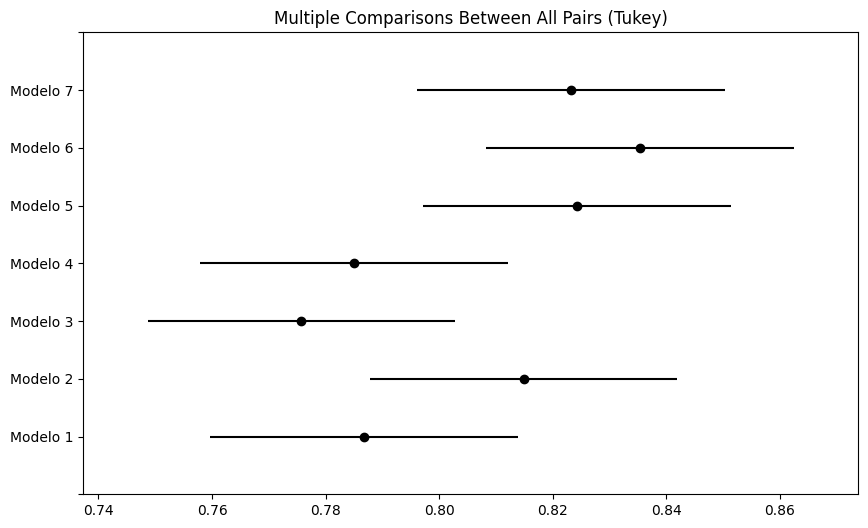

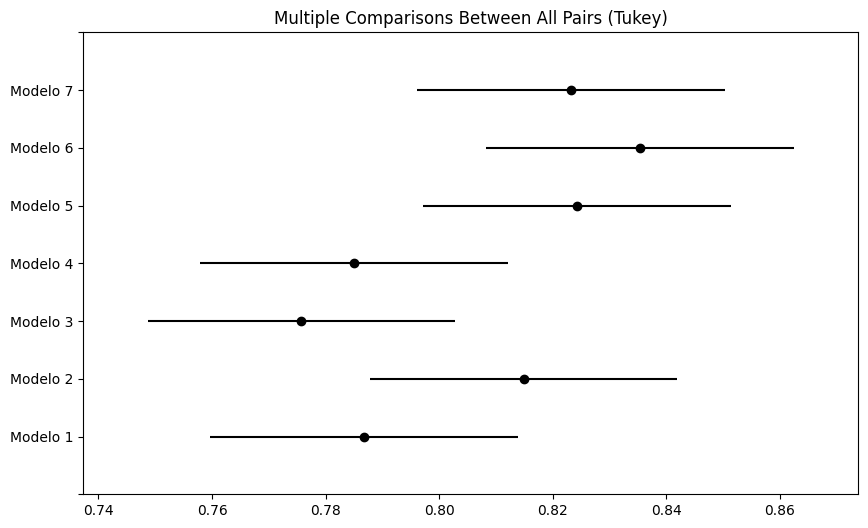

In [44]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Crear un DataFrame con los resultados
data = {
    'Modelo': ['Modelo 1']*10 + ['Modelo 2']*10 + ['Modelo 3']*10 + ['Modelo 4']*10 + ['Modelo 5']*10 + ['Modelo 6']*10 + ['Modelo 7']*10,
    'Recall': np.concatenate([tree_recall, knn_recall, nn_recall, svm_recall, rf_recall, xgb_recall, vs_recall])
}

df = pd.DataFrame(data)

# Realizar ANOVA
model = ols('Recall ~ C(Modelo)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Realizar la prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Recall'], groups=df['Modelo'], alpha=0.05)
print(tukey.summary())

# Visualizar los resultados de Tukey
tukey.plot_simultaneous()


### Gracias a la prueba de Tukey, evidenciamos que hay diferencia significativa en el recall entre los modelos 3 (Red Neuronal) y el modelo 6 (XGBoost), y el resto de modelos no tienen diferencia significativa por lo que escogemos los modelos menos complejos para pasarlos por un proceso de hiperparametrización.

### Hiperparametrización del modelo (Random Forest) utilizando GridSearch

### Hiperparametrizacion - RandomForest (GridSearch)

In [46]:
#Hiperparametrizacion de Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model_rfh = RandomForestClassifier()

# Definimos los hiperparametros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 20, 50],
    'min_samples_leaf': [2, 10,50],
    'max_samples':[0.6, 0.7, 0.8],
}

grid_search = GridSearchCV(model_rfh, param_grid, cv=10, scoring='recall_weighted', n_jobs=-1) #maximiza el scoring
grid_search.fit(X_train, Y_train) #70%

#Mejor Modelo
grid_best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print('Mejores hiperparametros: ', best_params)

# Evaluación del mejor modelo en el conjunto de prueba
Y_pred = grid_best_model.predict(X_test)

# Calcular el recall
recall = recall_score(Y_test, Y_pred, average='weighted')
print("Recall en el conjunto de prueba:", recall)

Mejores hiperparametros:  {'max_depth': 50, 'max_samples': 0.8, 'min_samples_leaf': 2, 'n_estimators': 300}
Recall en el conjunto de prueba: 0.653276955602537


### Guardamos el modelo final

In [51]:
import pickle
filename = 'modelo_rf.pkl'
variables= X.columns._values
pickle.dump([grid_best_model,labelencoder,variables,min_max_scaler], open(filename, 'wb'))